In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

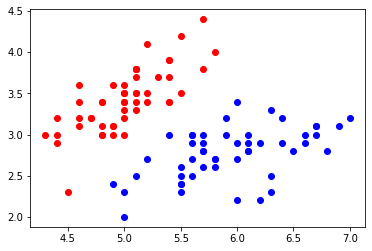

In [4]:
plt.scatter(X[y==0,0], X[y==0,1],color='red')
plt.scatter(X[y==1,0], X[y==1,1],color='blue')

In [5]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
x_standard = standardScaler.transform(X)

In [6]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(x_standard, y)

LinearSVC(C=1000000000.0)

In [7]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(1,-1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]

    y_predict = model.predict(X_new)
    zz=y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])

    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)


<ipython-input-7-774ae85d6e0b>:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)


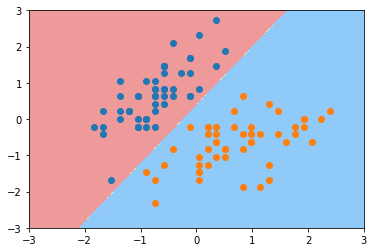

In [16]:
plot_decision_boundary(svc,axis=[-3,3,-3,3])
plt.scatter(x_standard[y==0,0],x_standard[y==0,1])
plt.scatter(x_standard[y==1,0],x_standard[y==1,1])

In [10]:
svc2 = LinearSVC(C=0.01)
svc2.fit(x_standard,y)

LinearSVC(C=0.01)

<ipython-input-7-774ae85d6e0b>:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)


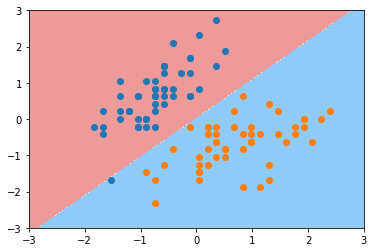

In [11]:
plot_decision_boundary(svc2,axis=[-3,3,-3,3])
plt.scatter(x_standard[y==0,0],x_standard[y==0,1])
plt.scatter(x_standard[y==1,0],x_standard[y==1,1])


In [12]:
svc.coef_


array([[ 4.03238546, -2.50697959]])

In [13]:
svc.intercept_

array([0.9273681])

In [22]:
def plot_svc_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(1,-1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(1,-1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]

    y_predict = model.predict(X_new)
    zz=y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])

    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

    w = model.coef_[0]
    b = model.intercept_[0]

    # w0*x0 + w1*x1 + b = 0
    # => x1= = -w0/w1 *x0 - b/w1
    plot_X = np.linspace(axis[0],axis[1],200)
    up_y = -w[0]/w[1] * plot_X - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_X - b/w[1] - 1/w[1]

    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])

    plt.plot(plot_X[up_index],up_y[up_index],color = 'black')
    plt.plot(plot_X[down_index],down_y[down_index],color = 'black')

<ipython-input-22-2917078d28d5>:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)


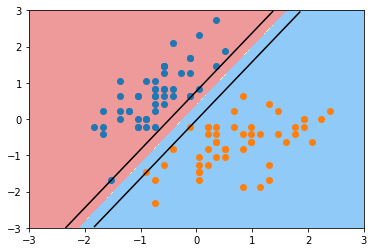

In [23]:
plot_svc_decision_boundary(svc,axis=[-3,3,-3,3])
plt.scatter(x_standard[y==0,0],x_standard[y==0,1])
plt.scatter(x_standard[y==1,0],x_standard[y==1,1])

<ipython-input-22-2917078d28d5>:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)


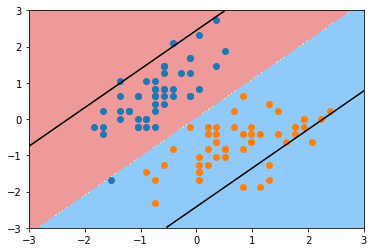

In [24]:
plot_svc_decision_boundary(svc2,axis=[-3,3,-3,3])
plt.scatter(x_standard[y==0,0],x_standard[y==0,1])
plt.scatter(x_standard[y==1,0],x_standard[y==1,1])
